In [1]:
import pandas as pd

In [7]:
df = pd.read_excel('ENB2012_data.xlsx')
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


## Построим графики для наглядности

In [5]:
import matplotlib.pyplot as plt

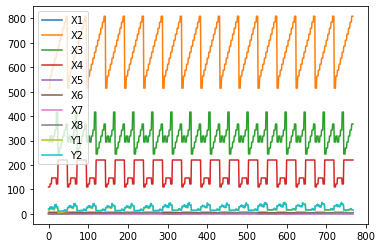

In [19]:
df.plot()

In [21]:
xs = range(len(df))

range(0, 768)

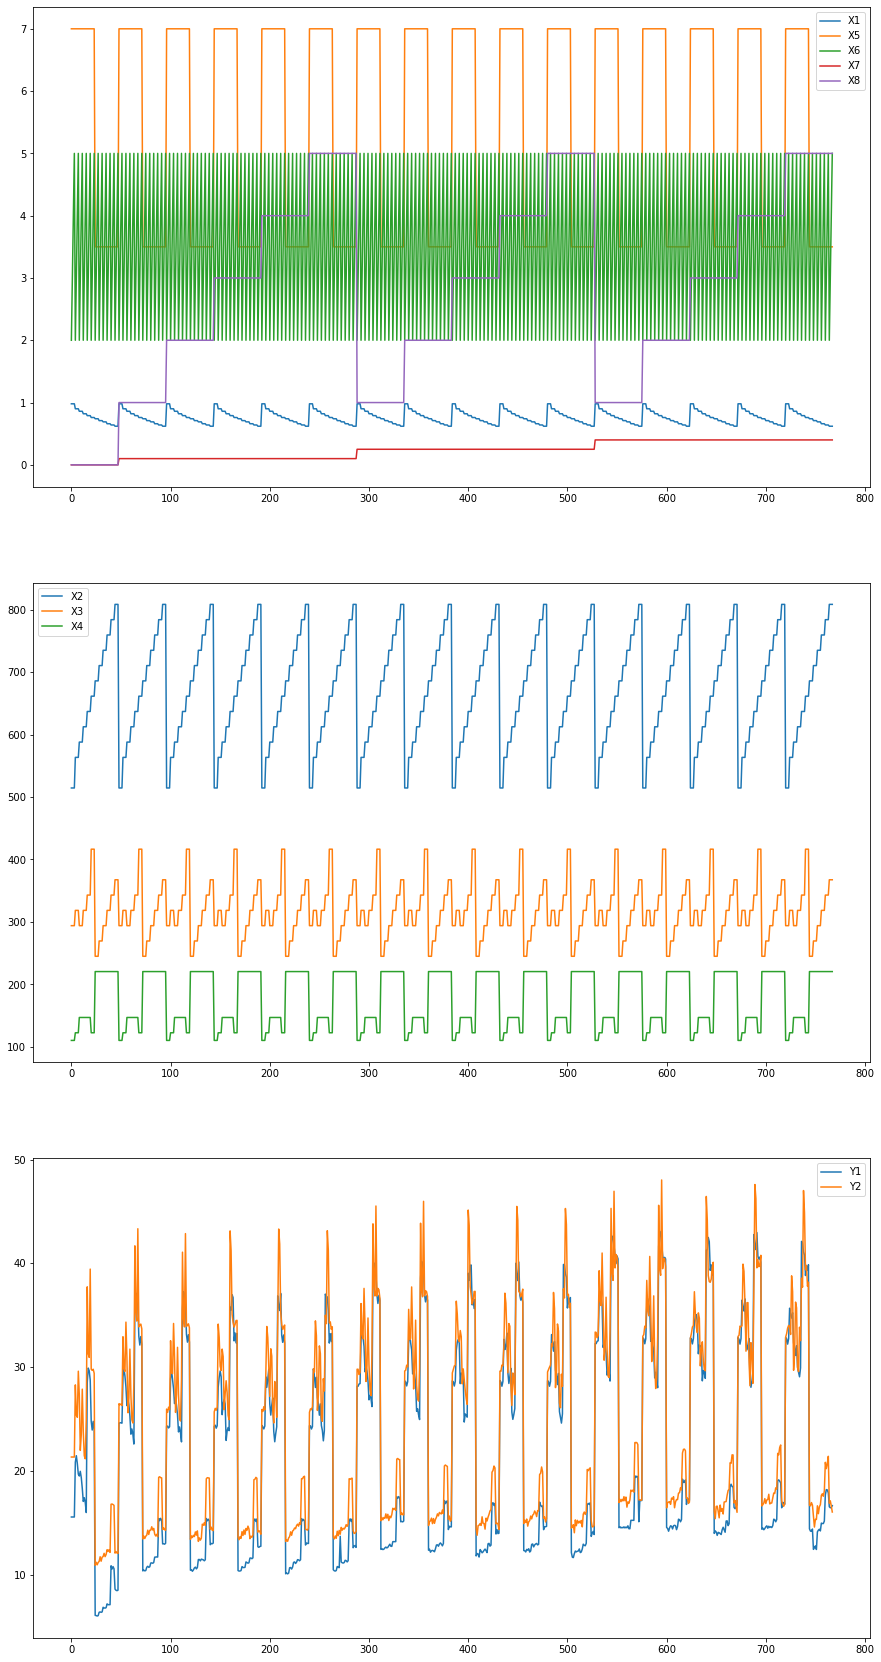

In [99]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 30))
# fig.subplot(511)
# fig.plot(xs, df['X1'].loc[:])
# fig.plot(xs, df['X7'].loc[:])
ax1.plot(xs, df['X1'].loc[:], label='X1')
ax1.plot(xs, df['X5'].loc[:], label='X5')
ax1.plot(xs, df['X6'].loc[:], label='X6')
ax1.plot(xs, df['X7'].loc[:], label='X7')
ax1.plot(xs, df['X8'].loc[:], label='X8')
ax1.legend()
ax2.plot(xs, df['X2'].loc[:], label='X2')
ax2.plot(xs, df['X3'].loc[:], label='X3')
ax2.plot(xs, df['X4'].loc[:], label='X4')
ax2.legend()
ax3.plot(xs, df['Y1'].loc[:], label='Y1')
ax3.plot(xs, df['Y2'].loc[:], label='Y2')
ax3.legend()

## Можно видеть, что у Y1, Y2, кроме периодической составляющей, есть ещё и линейная или также периодическая....

## Подготовим и нормализуем данные

In [103]:
data = [df[:].loc[i] for i in xs]
max = -1000
for elems in data:
    for elem in elems:
        if elem > max:
            max = elem
for i, _ in enumerate(data):
    data[i] = [data[i][j] / max for j, _ in enumerate(data[i])]
data

[[0.0012121212121212121,
  0.6363636363636364,
  0.36363636363636365,
  0.13636363636363635,
  0.008658008658008658,
  0.0024737167594310453,
  0.0,
  0.0,
  0.019233147804576377,
  0.026382189239332093],
 [0.0012121212121212121,
  0.6363636363636364,
  0.36363636363636365,
  0.13636363636363635,
  0.008658008658008658,
  0.0037105751391465678,
  0.0,
  0.0,
  0.019233147804576377,
  0.026382189239332093],
 [0.0012121212121212121,
  0.6363636363636364,
  0.36363636363636365,
  0.13636363636363635,
  0.008658008658008658,
  0.004947433518862091,
  0.0,
  0.0,
  0.019233147804576377,
  0.026382189239332093],
 [0.0012121212121212121,
  0.6363636363636364,
  0.36363636363636365,
  0.13636363636363635,
  0.008658008658008658,
  0.006184291898577613,
  0.0,
  0.0,
  0.019233147804576377,
  0.026382189239332093],
 [0.0011131725417439704,
  0.696969696969697,
  0.3939393939393939,
  0.15151515151515152,
  0.008658008658008658,
  0.0024737167594310453,
  0.0,
  0.0,
  0.02577612863327149,
  0.0

In [104]:
data_x = [data[i][:8] for i, _ in enumerate(data)]
data_x

[[0.0012121212121212121,
  0.6363636363636364,
  0.36363636363636365,
  0.13636363636363635,
  0.008658008658008658,
  0.0024737167594310453,
  0.0,
  0.0],
 [0.0012121212121212121,
  0.6363636363636364,
  0.36363636363636365,
  0.13636363636363635,
  0.008658008658008658,
  0.0037105751391465678,
  0.0,
  0.0],
 [0.0012121212121212121,
  0.6363636363636364,
  0.36363636363636365,
  0.13636363636363635,
  0.008658008658008658,
  0.004947433518862091,
  0.0,
  0.0],
 [0.0012121212121212121,
  0.6363636363636364,
  0.36363636363636365,
  0.13636363636363635,
  0.008658008658008658,
  0.006184291898577613,
  0.0,
  0.0],
 [0.0011131725417439704,
  0.696969696969697,
  0.3939393939393939,
  0.15151515151515152,
  0.008658008658008658,
  0.0024737167594310453,
  0.0,
  0.0],
 [0.0011131725417439704,
  0.696969696969697,
  0.3939393939393939,
  0.15151515151515152,
  0.008658008658008658,
  0.0037105751391465678,
  0.0,
  0.0],
 [0.0011131725417439704,
  0.696969696969697,
  0.39393939393939

In [105]:
data_y = [data[i][8:] for i, _ in enumerate(data)]
data_y

[[0.019233147804576377, 0.026382189239332093],
 [0.019233147804576377, 0.026382189239332093],
 [0.019233147804576377, 0.026382189239332093],
 [0.019233147804576377, 0.026382189239332093],
 [0.02577612863327149, 0.03497835497835498],
 [0.026542980828695117, 0.03139146567717996],
 [0.025615337043908473, 0.031119356833642548],
 [0.024341372912801484, 0.03661100803957947],
 [0.02411873840445269, 0.03376623376623377],
 [0.024675324675324673, 0.02717377860235003],
 [0.023920841063698205, 0.029053803339517622],
 [0.022646876932591216, 0.034471243042671615],
 [0.021088435374149662, 0.02940012368583797],
 [0.021533704390847248, 0.026542980828695117],
 [0.020964749536178107, 0.02617192331478046],
 [0.019764996907854052, 0.030834879406307976],
 [0.0352752009894867, 0.04666666666666666],
 [0.03698206555349412, 0.03867656153370439],
 [0.03664811379097093, 0.038256029684601116],
 [0.035559678416821276, 0.04878169449598021],
 [0.030636982065553493, 0.03684601113172541],
 [0.029598021026592456, 0.0367

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3)
y_train

[[0.040927643784786645, 0.04191713048855906],
 [0.012801484230055659, 0.016883116883116885],
 [0.017835497835497836, 0.021273964131106986],
 [0.014965986394557823, 0.019257884972170687],
 [0.01819418676561534, 0.021657390228818803],
 [0.015547309833024119, 0.019097093382807667],
 [0.014162028447742732, 0.016326530612244896],
 [0.04962275819418676, 0.04608534322820037],
 [0.017773654916512057, 0.02045763760049474],
 [0.014013605442176872, 0.01855287569573284],
 [0.015275200989486704, 0.018218923933209646],
 [0.0402226345083488, 0.04186765615337044],
 [0.04961038961038961, 0.05042671614100186],
 [0.010451453308596165, 0.014941249226963512],
 [0.04008658008658008, 0.04178107606679035],
 [0.018973407544836115, 0.022090290661719234],
 [0.03698206555349412, 0.03867656153370439],
 [0.015720470006184293, 0.01748917748917749],
 [0.01753865182436611, 0.021014223871366727],
 [0.015374149659863945, 0.018787878787878787],
 [0.014359925788497216, 0.017105751391465678],
 [0.03173778602350031, 0.03252

# Линейная регрессия

In [174]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train, [y[0] for y in y_train])
y_predict1 = model1.predict(X_test)
y_train_predict1 = model1.predict(X_train)

In [175]:
model2 = LinearRegression()
model2.fit(X_train, [y[1] for y in y_train])
y_predict2 = model2.predict(X_test)
y_train_predict2 = model2.predict(X_train)

## Метрики

In [176]:
model1.score(X_test, [y[0] for y in y_test])

0.9035816467070545

In [177]:
model1.score(X_train, [y[0] for y in y_train])

0.9212514413978239

In [178]:
model2.score(X_test, [y[1] for y in y_test])

0.8829573378487064

In [179]:
model2.score(X_train, [y[1] for y in y_train])

0.88908981564733

In [180]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print("---- Предсказание Y1 -----")
print(f'RMSE для тестовой выборки: {sqrt(mean_squared_error([y[0] for y in y_test], y_predict1))}')
print(f'RMSE для тренировочной выборки: {sqrt(mean_squared_error([y[0] for y in y_train], y_train_predict1))}')
print(f'Коэффициент детерминации для тестовой выборки: {abs(r2_score([y[0] for y in y_test], y_predict1))}')
print(f'Коэффициент детерминации для тренировочной выборки: {abs(r2_score([y[0] for y in y_train], y_train_predict1))}')
print("---- Предсказание Y2 -----")
print(f'RMSE для тестовой выборки: {sqrt(mean_squared_error([y[1] for y in y_test], y_predict2))}')
print(f'RMSE для тренировочной выборки: {sqrt(mean_squared_error([y[1] for y in y_train], y_train_predict2))}')
print(f'Коэффициент детерминации для тестовой выборки: {abs(r2_score([y[1] for y in y_test], y_predict2))}')
print(f'Коэффициент детерминации для тренировочной выборки: {abs(r2_score([y[1] for y in y_train], y_train_predict2))}')

---- Предсказание Y1 -----
RMSE для тестовой выборки: 0.0038084114030847486
RMSE для тренировочной выборки: 0.0035246297043569153
Коэффициент детерминации для тестовой выборки: 0.9035816467070545
Коэффициент детерминации для тренировочной выборки: 0.9212514413978239
---- Предсказание Y2 -----
RMSE для тестовой выборки: 0.003942321553935936
RMSE для тренировочной выборки: 0.0039493415236842395
Коэффициент детерминации для тестовой выборки: 0.8829573378487064
Коэффициент детерминации для тренировочной выборки: 0.88908981564733


## Среднеквадратическая ошибка достаточно мала, а коэффициент детерминации достаточно высок

## Построим графики

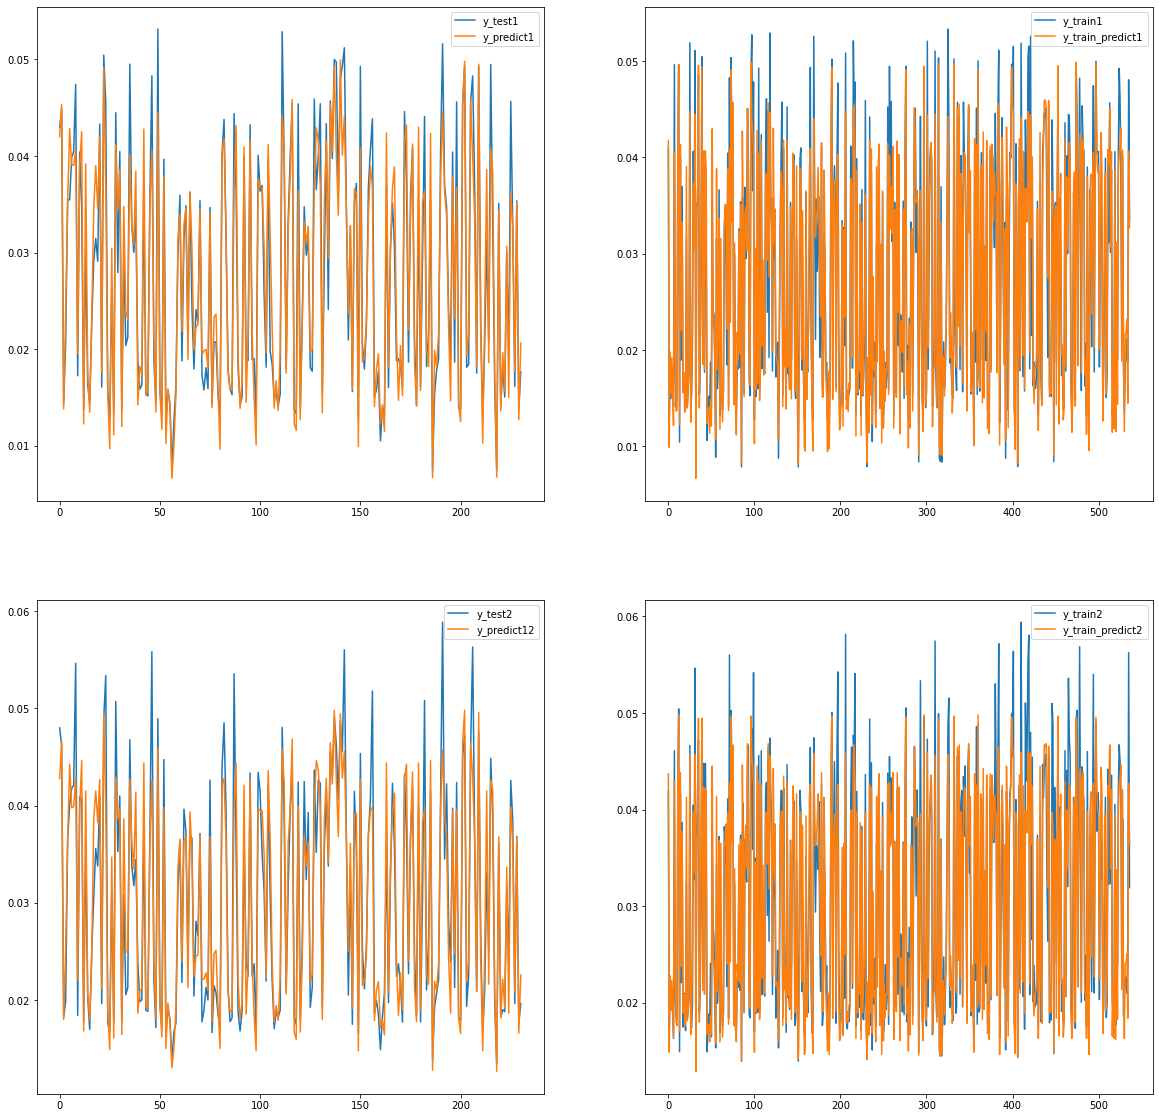

In [182]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))
ax1.plot(range(len(y_test)), [y[0] for y in y_test], label="y_test1")
ax1.plot(range(len(y_predict1)), y_predict1, label='y_predict1')
ax1.legend()
ax2.plot(range(len(y_train)), [y[0] for y in y_train], label="y_train1")
ax2.plot(range(len(y_train_predict1)), y_train_predict1, label="y_train_predict1")
ax2.legend()
ax3.plot(range(len(y_test)), [y[1] for y in y_test], label="y_test2")
ax3.plot(range(len(y_predict2)), y_predict2, label='y_predict12')
ax3.legend()
ax4.plot(range(len(y_train)), [y[1] for y in y_train], label="y_train2")
ax4.plot(range(len(y_train_predict2)), y_train_predict2, label="y_train_predict2")
ax4.legend()

## В принципе, графиик достаточно похожи

# Градиентный бустинг (model1 - предсказание Y1, model2 - предсказание Y2)

In [185]:
from sklearn.ensemble import GradientBoostingRegressor

model1 = GradientBoostingRegressor()
model1.fit(X_train, [y[0] for y in y_train])
y_predict1 = model1.predict(X_test)
y_train_predict1 = model1.predict(X_train)

In [189]:
print("---- Предсказание Y1 ----")
print(f'Score для тестовой выборки: {model1.score(X_train, [y[0] for y in y_train])}')
print(f'Score для тренировочной выборки: {model1.score(X_test, [y[0] for y in y_test])}')
print(f'RMSE для тестовой выборки: {sqrt(mean_squared_error([y[0] for y in y_test], y_predict1))}')
print(f'RMSE для тренировочной выборки: {sqrt(mean_squared_error([y[0] for y in y_train], y_train_predict1))}')
print(f'Коэффициент детерминации для тестовой выборки: {abs(r2_score([y[0] for y in y_test], y_predict1))}')
print(f'Коэффициент детерминации для тренировочной выборки: {abs(r2_score([y[0] for y in y_train], y_train_predict1))}')

---- Предсказание Y1 ----
Score для тестовой выборки: 0.9983954093820328
Score для тренировочной выборки: 0.9971820974279667
RMSE для тестовой выборки: 0.0006510689568771713
RMSE для тренировочной выборки: 0.0005031231660066759
Коэффициент детерминации для тестовой выборки: 0.9971820974279667
Коэффициент детерминации для тренировочной выборки: 0.9983954093820328


In [187]:
model2 = GradientBoostingRegressor()
model2.fit(X_train, [y[1] for y in y_train])
y_predict2 = model2.predict(X_test)
y_train_predict2 = model2.predict(X_train)

In [190]:
print("---- Предсказание Y2 ----")
print(f'Score для тестовой выборки: {model2.score(X_train, [y[0] for y in y_train])}')
print(f'Score для тренировочной выборки: {model2.score(X_test, [y[0] for y in y_test])}')
print(f'RMSE для тестовой выборки: {sqrt(mean_squared_error([y[1] for y in y_test], y_predict2))}')
print(f'RMSE для тренировочной выборки: {sqrt(mean_squared_error([y[1] for y in y_train], y_train_predict2))}')
print(f'Коэффициент детерминации для тестовой выборки: {abs(r2_score([y[1] for y in y_test], y_predict2))}')
print(f'Коэффициент детерминации для тренировочной выборки: {abs(r2_score([y[1] for y in y_train], y_train_predict2))}')

---- Предсказание Y2 ----
Score для тестовой выборки: 0.9261976447079336
Score для тренировочной выборки: 0.9201078157345552
RMSE для тестовой выборки: 0.00195470062984267
RMSE для тренировочной выборки: 0.0015840866869712674
Коэффициент детерминации для тестовой выборки: 0.9712259755552555
Коэффициент детерминации для тренировочной выборки: 0.9821565046343116


## Среднеквадратическая ошибка еще более мала, чем при линейной регрессии, а коэф детерминации, соответственно, больше

## Строим графики

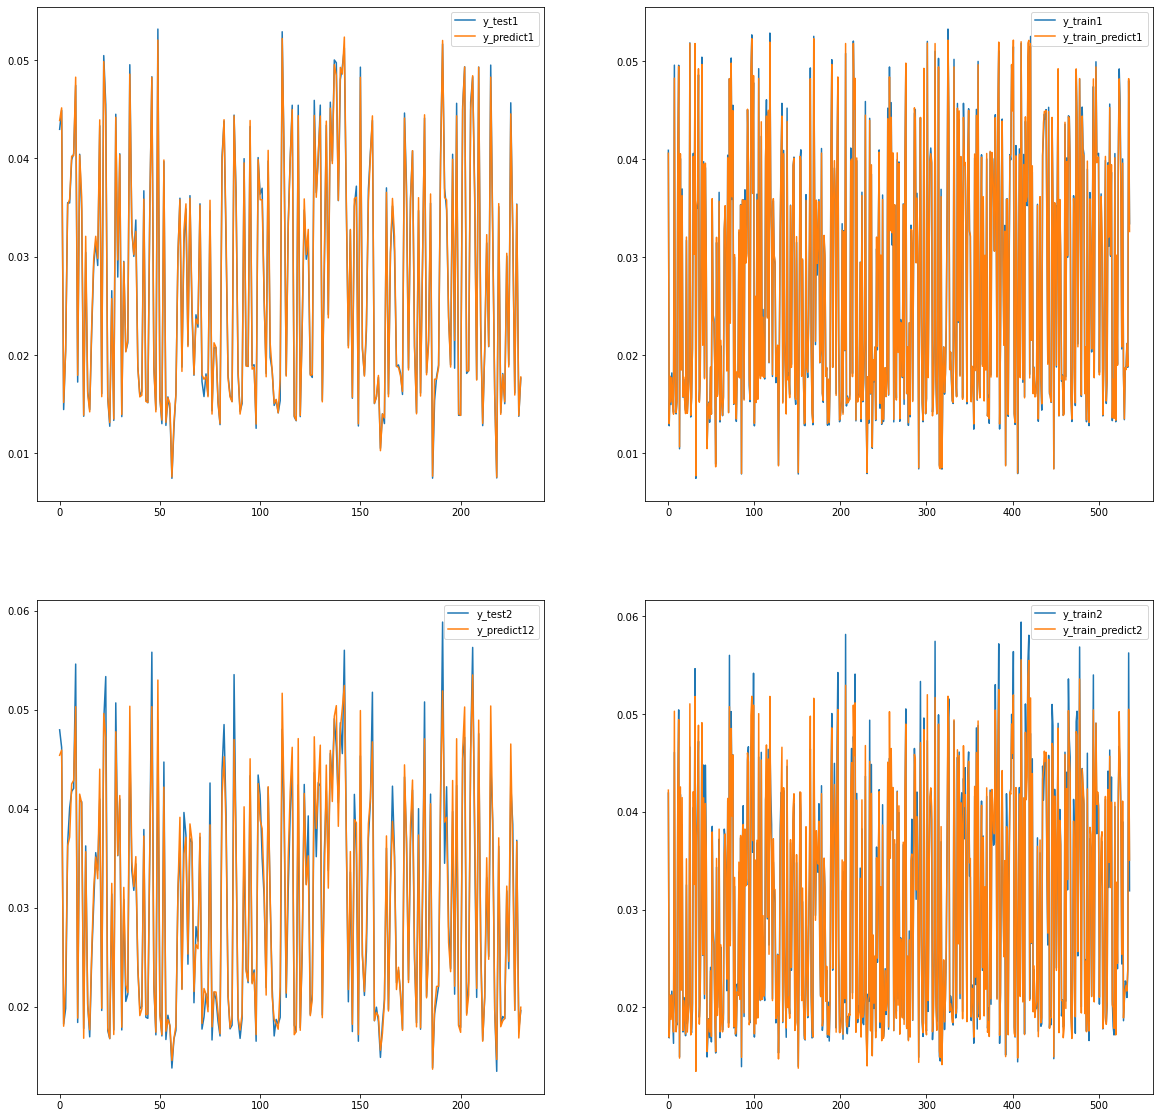

In [191]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))
ax1.plot(range(len(y_test)), [y[0] for y in y_test], label="y_test1")
ax1.plot(range(len(y_predict1)), y_predict1, label='y_predict1')
ax1.legend()
ax2.plot(range(len(y_train)), [y[0] for y in y_train], label="y_train1")
ax2.plot(range(len(y_train_predict1)), y_train_predict1, label="y_train_predict1")
ax2.legend()
ax3.plot(range(len(y_test)), [y[1] for y in y_test], label="y_test2")
ax3.plot(range(len(y_predict2)), y_predict2, label='y_predict12')
ax3.legend()
ax4.plot(range(len(y_train)), [y[1] for y in y_train], label="y_train2")
ax4.plot(range(len(y_train_predict2)), y_train_predict2, label="y_train_predict2")
ax4.legend()

## Графики стали ещё более похожими

# Линейный метод опорных векторов

In [203]:
from sklearn.svm import LinearSVR

model1 = LinearSVR()
model1.fit(X_train, [y[0] for y in y_train])
y_predict1 = model1.predict(X_test)
y_train_predict1 = model1.predict(X_train)

/Users/in7erval/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [204]:
print("---- Предсказание Y1 ----")
print(f'Score для тестовой выборки: {model2.score(X_train, [y[0] for y in y_train])}')
print(f'Score для тренировочной выборки: {model2.score(X_test, [y[0] for y in y_test])}')
print(f'RMSE для тестовой выборки: {sqrt(mean_squared_error([y[0] for y in y_test], y_predict1))}')
print(f'RMSE для тренировочной выборки: {sqrt(mean_squared_error([y[0] for y in y_train], y_train_predict1))}')
print(f'Коэффициент детерминации для тестовой выборки: {abs(r2_score([y[0] for y in y_test], y_predict1))}')
print(f'Коэффициент детерминации для тренировочной выборки: {abs(r2_score([y[0] for y in y_train], y_train_predict1))}')

---- Предсказание Y1 ----
Score для тестовой выборки: 0.918609828079173
Score для тренировочной выборки: 0.9250994188670048
RMSE для тестовой выборки: 0.005484053336040926
RMSE для тренировочной выборки: 0.005834826165991438
Коэффициент детерминации для тестовой выборки: 0.8000712106429415
Коэффициент детерминации для тренировочной выборки: 0.7841900505365613


In [194]:
model2 = LinearSVR()
model2.fit(X_train, [y[1] for y in y_train])
y_predict2 = model2.predict(X_test)
y_train_predict2 = model2.predict(X_train)

/Users/in7erval/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [205]:
print("---- Предсказание Y2 ----")
print(f'Score для тестовой выборки: {model2.score(X_train, [y[0] for y in y_train])}')
print(f'Score для тренировочной выборки: {model2.score(X_test, [y[0] for y in y_test])}')
print(f'RMSE для тестовой выборки: {sqrt(mean_squared_error([y[1] for y in y_test], y_predict2))}')
print(f'RMSE для тренировочной выборки: {sqrt(mean_squared_error([y[1] for y in y_train], y_train_predict2))}')
print(f'Коэффициент детерминации для тестовой выборки: {abs(r2_score([y[1] for y in y_test], y_predict2))}')
print(f'Коэффициент детерминации для тренировочной выборки: {abs(r2_score([y[1] for y in y_train], y_train_predict2))}')

---- Предсказание Y2 ----
Score для тестовой выборки: 0.918609828079173
Score для тренировочной выборки: 0.9250994188670048
RMSE для тестовой выборки: 0.002280519450289009
RMSE для тренировочной выборки: 0.0007774040973836703
Коэффициент детерминации для тестовой выборки: 0.9608341403138004
Коэффициент детерминации для тренировочной выборки: 0.9957025018852569


## Среднеквадратическая ошибка намного, чем у при линейной регрессии, и, соответственно выше коэффициент детерминации. Плохо!!!1

## Строим графики

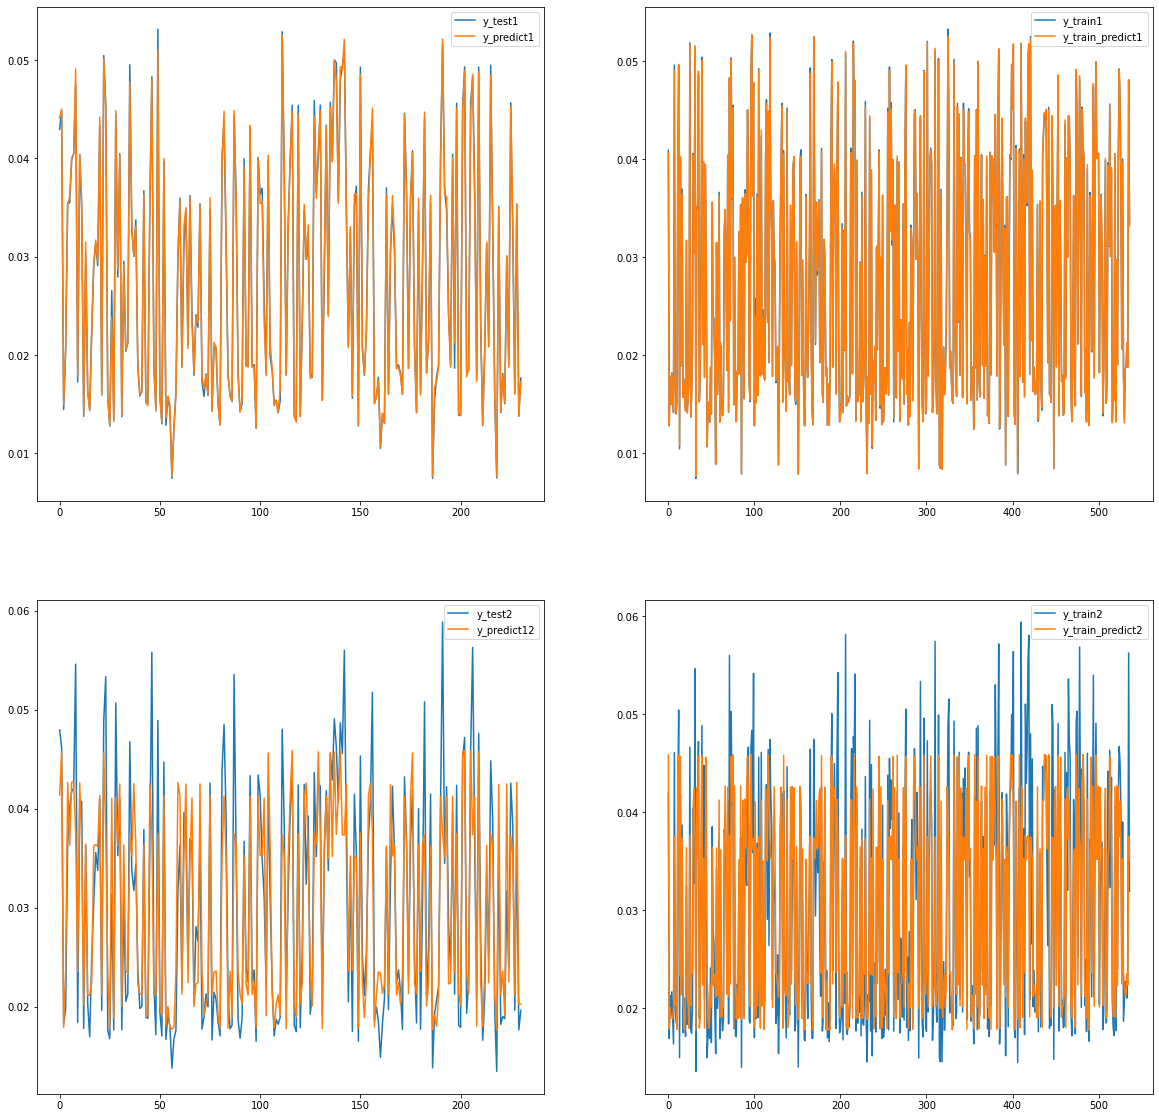

In [199]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))
ax1.plot(range(len(y_test)), [y[0] for y in y_test], label="y_test1")
ax1.plot(range(len(y_predict1)), y_predict1, label='y_predict1')
ax1.legend()
ax2.plot(range(len(y_train)), [y[0] for y in y_train], label="y_train1")
ax2.plot(range(len(y_train_predict1)), y_train_predict1, label="y_train_predict1")
ax2.legend()
ax3.plot(range(len(y_test)), [y[1] for y in y_test], label="y_test2")
ax3.plot(range(len(y_predict2)), y_predict2, label='y_predict12')
ax3.legend()
ax4.plot(range(len(y_train)), [y[1] for y in y_train], label="y_train2")
ax4.plot(range(len(y_train_predict2)), y_train_predict2, label="y_train_predict2")
ax4.legend()

## График для Y1 очень похож, но Y2 слабо похож

# Случайный лес

In [197]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor()
model1.fit(X_train, [y[0] for y in y_train])
y_predict1 = model1.predict(X_test)
y_train_predict1 = model1.predict(X_train)

In [198]:
print("---- Предсказание Y1 ----")
print(f'Score для тестовой выборки: {model2.score(X_train, [y[0] for y in y_train])}')
print(f'Score для тренировочной выборки: {model2.score(X_test, [y[0] for y in y_test])}')
print(f'RMSE для тестовой выборки: {sqrt(mean_squared_error([y[0] for y in y_test], y_predict1))}')
print(f'RMSE для тренировочной выборки: {sqrt(mean_squared_error([y[0] for y in y_train], y_train_predict1))}')
print(f'Коэффициент детерминации для тестовой выборки: {abs(r2_score([y[0] for y in y_test], y_predict1))}')
print(f'Коэффициент детерминации для тренировочной выборки: {abs(r2_score([y[0] for y in y_train], y_train_predict1))}')

---- Предсказание Y1 ----
Score для тестовой выборки: 0.7321164864216854
Score для тренировочной выборки: 0.748528395644827
RMSE для тестовой выборки: 0.0006642036542122107
RMSE для тренировочной выборки: 0.00023352983963356437
Коэффициент детерминации для тестовой выборки: 0.9970672535516998
Коэффициент детерминации для тренировочной выборки: 0.9996542992024329


In [200]:
model2 = RandomForestRegressor()
model2.fit(X_train, [y[1] for y in y_train])
y_predict2 = model2.predict(X_test)
y_train_predict2 = model2.predict(X_train)

In [201]:
print("---- Предсказание Y2 ----")
print(f'Score для тестовой выборки: {model2.score(X_train, [y[0] for y in y_train])}')
print(f'Score для тренировочной выборки: {model2.score(X_test, [y[0] for y in y_test])}')
print(f'RMSE для тестовой выборки: {sqrt(mean_squared_error([y[1] for y in y_test], y_predict2))}')
print(f'RMSE для тренировочной выборки: {sqrt(mean_squared_error([y[1] for y in y_train], y_train_predict2))}')
print(f'Коэффициент детерминации для тестовой выборки: {abs(r2_score([y[1] for y in y_test], y_predict2))}')
print(f'Коэффициент детерминации для тренировочной выборки: {abs(r2_score([y[1] for y in y_train], y_train_predict2))}')

---- Предсказание Y1 ----
Score для тестовой выборки: 0.918609828079173
Score для тренировочной выборки: 0.9250994188670048
RMSE для тестовой выборки: 0.002280519450289009
RMSE для тренировочной выборки: 0.0007774040973836703
Коэффициент детерминации для тестовой выборки: 0.9608341403138004
Коэффициент детерминации для тренировочной выборки: 0.9957025018852569


## Ошибки очень маленькие, супер!! Случайный лес -- круто

 ## Строим графики

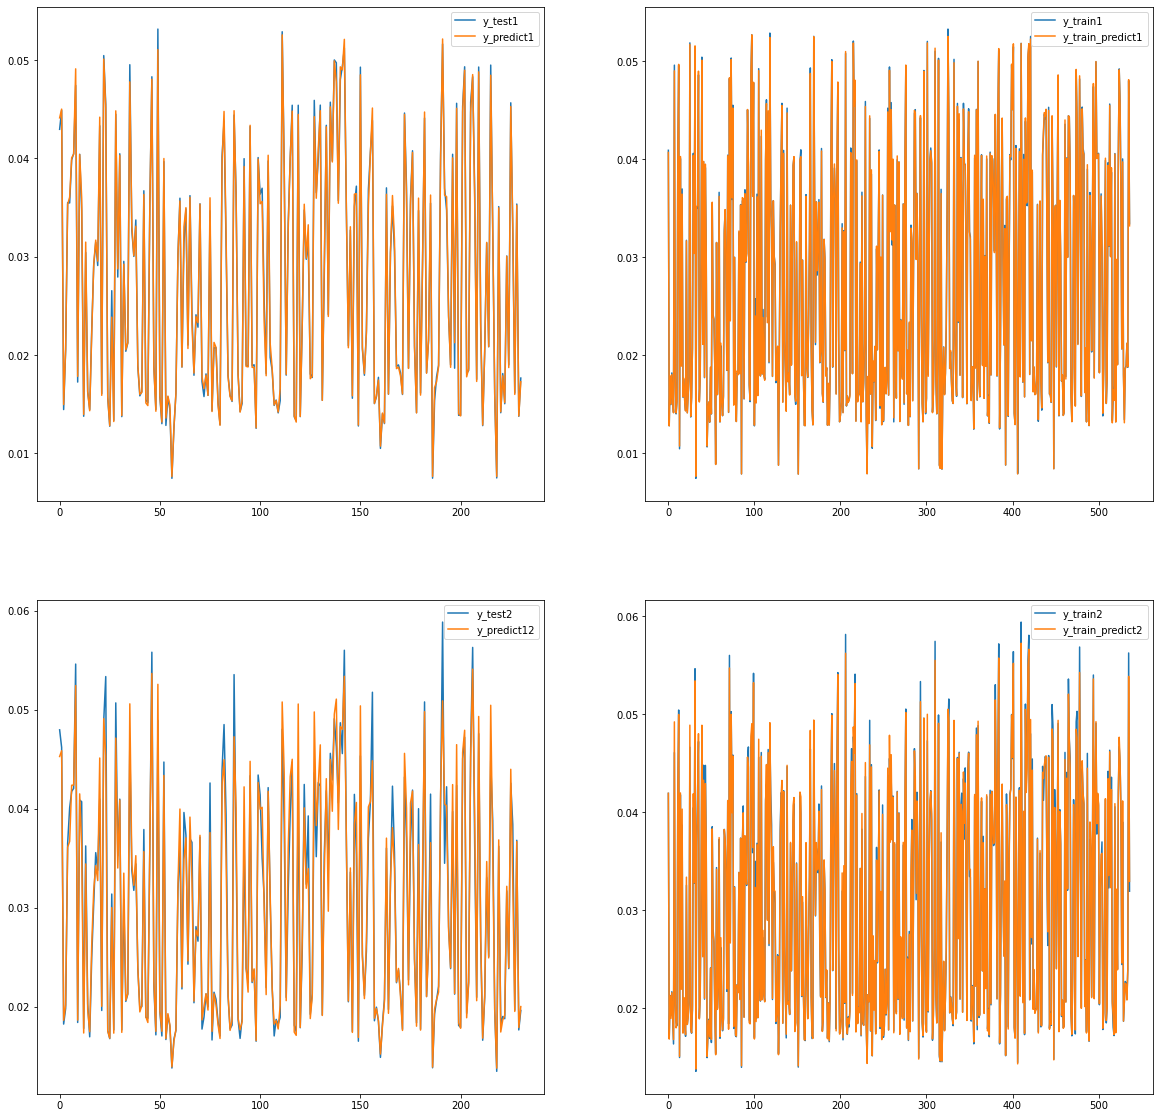

In [202]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))
ax1.plot(range(len(y_test)), [y[0] for y in y_test], label="y_test1")
ax1.plot(range(len(y_predict1)), y_predict1, label='y_predict1')
ax1.legend()
ax2.plot(range(len(y_train)), [y[0] for y in y_train], label="y_train1")
ax2.plot(range(len(y_train_predict1)), y_train_predict1, label="y_train_predict1")
ax2.legend()
ax3.plot(range(len(y_test)), [y[1] for y in y_test], label="y_test2")
ax3.plot(range(len(y_predict2)), y_predict2, label='y_predict12')
ax3.legend()
ax4.plot(range(len(y_train)), [y[1] for y in y_train], label="y_train2")
ax4.plot(range(len(y_train_predict2)), y_train_predict2, label="y_train_predict2")
ax4.legend()